In [1]:
import pip
pip.main(["install","twitter"])
pip.main(["install","textblob"])
from textblob import TextBlob
import nltk
import numpy as np
import pandas as pd
import json
import twitter
from twitter import Twitter 
from twitter import OAuth 
from twitter import TwitterHTTPError 
from twitter import TwitterStream
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
from collections import Counter

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Authenticate
ACCESS_TOKEN = '3151548164-KGXKM6vZipCfBfIA16bUxBaNhIcg7CmfiYb6iWU'
ACCESS_SECRET = '8qKGbi5JRnrZb3yKcKijbYxVHVZ4lFonuQDsN3dWonzao'
consumer_key = 'nqn05e7YWcj57FBzJhu2vJpQU'
consumer_secret = 'a3Y1S2DXVkbRoGaO3NMgstbGm4LSAyRnKSeShseZFrFqWmTwJo'
oauth = OAuth(ACCESS_TOKEN, ACCESS_SECRET, consumer_key, consumer_secret)
twitter = Twitter(auth=oauth)

In [3]:
# Search for a term
search_term = twitter.search.tweets(q = 'Grammys', count = 250)
statuses = search_term['statuses']

In [4]:
# Normalize the results into a pandas table
df2 = json_normalize(search_term, 'statuses')
status_texts = df2["text"]

In [5]:
# Loop through each row run the sentiment analysis on each sentence
polarity = []
subjectivity = []
for sen in status_texts:
    polarity.append(TextBlob(sen).sentiment.polarity)
    subjectivity.append(TextBlob(sen).sentiment.subjectivity)

In [7]:
# Store the polarity and subjectivity into another data table
df_final = pd.DataFrame({'Polarity' : polarity, 'Subjectivity' : subjectivity})
df_final

,Polarity,Subjectivity
0,0.800000,1.000000
1,0.466667,0.762963
2,0.000000,0.000000
3,0.466667,0.762963
4,0.000000,0.000000
5,0.466667,0.762963
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.466667,0.762963


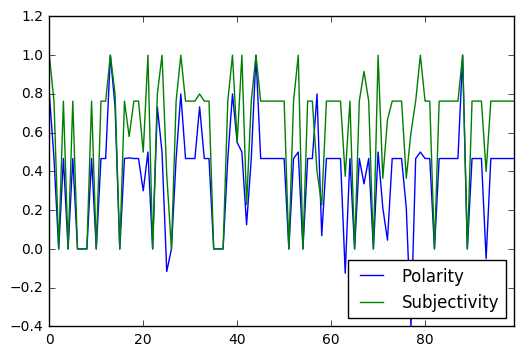

In [8]:
# Plot polarity and subjectivity
%matplotlib inline
import matplotlib.pyplot as plt
df_final[['Polarity','Subjectivity']].plot()

In [9]:
# Take the tweet messages in the "text" column (row by row) and break it into words, store it another data frame
status_texts = [status['text'] for status in statuses]
words = [w
        for t in status_texts
            for w in t.split()]
df_word = pd.DataFrame(words)
df_word

,0
0,RT
1,@teaofstans:
2,Ariana
3,Grande
4,-Dates
5,every
6,guy
7,she
8,collabs
9,with


In [10]:
# Finally take the final data frame and group by the frequency (count) of the words
words_count = json_normalize(Counter(words))
words_count = words_count.transpose()
words_count.columns = ['Count']
words_count

,Count
"""Why",1
"""rocking",1
#1,2
#1s.,1
#3YearsTheNewClassic,1
#DeleonLifestyle,1
#GRAMMYs,5
#GrammyNaTNT,1
#Grammys,3
#Grammys!!!!!!!!!!,2


C:\Users\Shraddha Somani\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


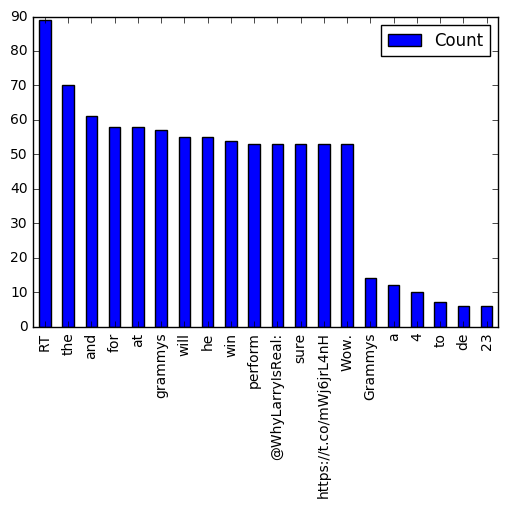

In [11]:
# Create bar graph of top 20 words
words_top20 = words_count.sort('Count', ascending=False).head(20)
words_top20
%matplotlib inline
import matplotlib.pyplot as plt
words_top20.plot(kind='bar')